<class 'numpy.ndarray'>
[15.590455893599998]


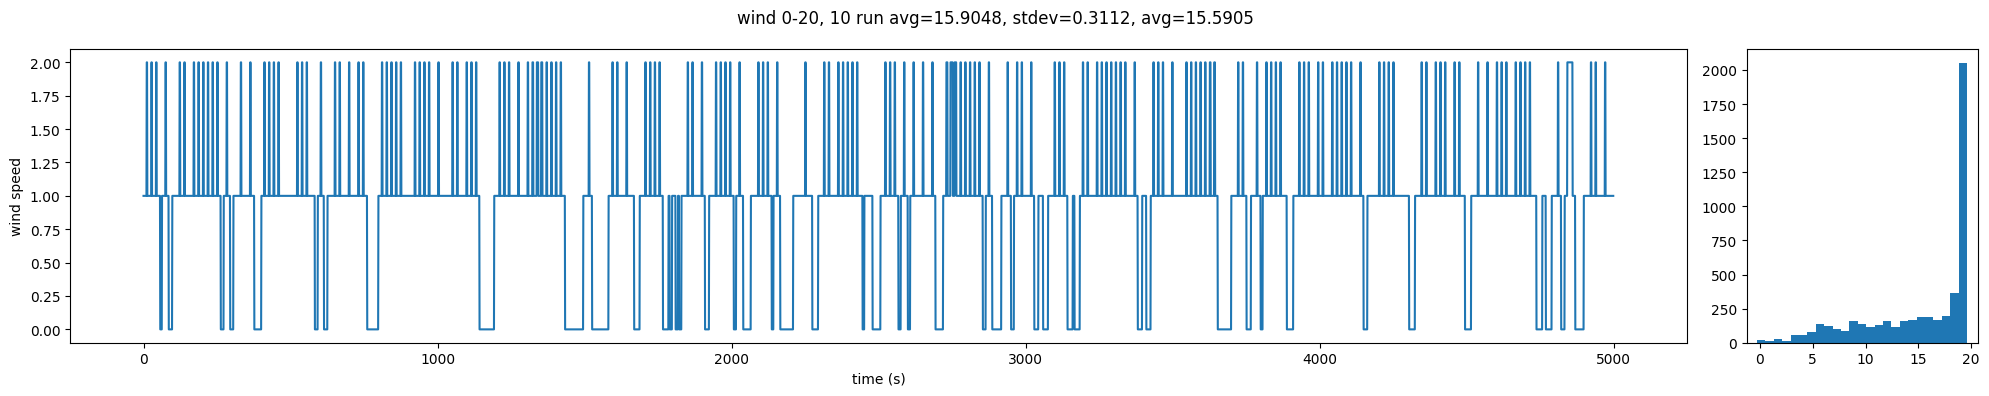

In [17]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import random
import statistics
import subprocess

#read all csv files in the current directory
path = r'.'
all_files = glob.glob(path + "/*.csv")

def processDataset(stream, name, plot=True, printAvg=True):
    df = pd.read_csv(stream, header=0)
    #calculate the average of the x column
    avg = df['x'].mean()
    if printAvg:
        print(f'{name} average: {avg}')
    if plot:
        data = df['x'].values
        fig, axs = plt.subplots(1, 2, tight_layout=False, gridspec_kw={'width_ratios': [7, 1]}, figsize=(20, 4))
        fig.suptitle(f'{name}, avg={avg:.4f}')
        axs[0].plot(data//10)
        print(type(data))
        axs[0].set_xlabel('time (s)')
        axs[0].set_ylabel('wind speed')
        
        # axs[0].set_xticks(axs[0].get_xticks() // 10)
        axs[1].hist(data, bins=25, align='left')
    return avg

# main

def main():
    # windStrengths = [(12,27), (4,19), (2,23), (1,19), (8,20), (1,19), (1,23), (2,22), (5,25), (25,25), (1,4), (0,21), (5,16), (4,14), (9,19), (3,19)] * 1
    windStrengths = [(0,20)]

    avgWindStrengths = []

    #run windSim as a subprocess and run processDataset on the output


    for wind in windStrengths:
        localAvgWindStrengths = []
        for i in range(0, 10):
            p = subprocess.Popen(["build/windSim", "-m", str(wind[0]), "-M", str(wind[1]), "-s", str(random.randint(0, 0xffff)), "-i", str(5000)], stdout=subprocess.PIPE)
            avg = processDataset(p.stdout, f'wind {wind[0]}-{wind[1]}', printAvg=False, plot=False)
            localAvgWindStrengths.append(avg)
        p = subprocess.Popen(["build/windSim", "-m", str(wind[0]), "-M", str(wind[1]), "-s", str(random.randint(0, 0xffff)), "-i", str(5000)], stdout=subprocess.PIPE)
        avg = processDataset(p.stdout, f'wind {wind[0]}-{wind[1]}, 10 run avg={statistics.mean(localAvgWindStrengths):.4f}, stdev={statistics.stdev(localAvgWindStrengths):.4f}', printAvg=False, plot=True)
        avgWindStrengths.append(avg)


    print(avgWindStrengths)

    if(len(windStrengths) > 1):
        print(f'Average of averages: {statistics.mean(avgWindStrengths)}')
        print(f'Standard deviation of averages: {statistics.stdev(avgWindStrengths)}')

if __name__ == "__main__":
    main()